# BHARAT INTERN TASK- 3

## Handwritten Number Recognition

## <span style='color:rgb(205, 0, 153)'>1 | Abstract </span><a class="anchor" id="abstract"></a> 
<hr>

### <b>Introduction</b>
Handwritten Digit Recognition is the process of digitizing human handwritten digit images. It is a difficult task for the machine because handwritten digits are not perfect and can be made with a variety of flavors. In order to address this issue, we created HDR, which uses the image of a digit to identify the digit that is present in the image.

In this project, we developed a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) <code>(CNN)</code> model using <b>Tensorflow framework</b> to <b>Recognition of Handwritten Digit</b>.

A convolutional neural network (CNN, or ConvNet) is a Deep Learning algorithm that can take in an input image, assign learnable weights and biases to various objects in the image and be able to distinguish one from the other. 

It is used to analyse visual imagery. <code>Object detection</code>, <code>face recognition</code>, <code>robotics</code>, <code>video analysis</code>, <code>segmentation</code>, <code>pattern recognition</code>, <code>natural language processing</code>, <code>spam detection</code>, <code>topic categorization</code>, <code>regression analysis</code>, <code>speech recognition</code>, <code>image classification</code> are some of the examples that can be done using Convolutional Neural Networking.
### <b>Approach</b>
We have used Sequential Keras model which has two pairs of <code>Convolution2D</code> and <code>MaxPooling2D</code> layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging. After that we will use Flatten layer to convert multidimensional parameters to vector.

The last layer has a Dense layer with 10 Softmax outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...
#### <b>Result</b>
CNN performed well, providing validation accuracy and loss score of <code>98.9%%</code> and <code>4.5%</code> respectively.
#### <b>Conclusion</b>
Convolutional neural network (CNN, or ConvNet) can be used to predict Handwritten Digits reasonably. We have successfully developed Handwritten digit recognition with Python, Tensorflow, and Machine Learning libraries. Handwritten Digits have been recognized by more than <code>98.9%</code> validation accuracy.

<b>Keywords</b> – convolutional neural network, mnist, deep learning, handwritten digits recognition.

## <span style='color:rgb(205, 0, 153)'>2 | Import the dependencies and load the dataset </span> <a class="anchor" id="importData"></a>
<hr>
​
[Back to Table of Contents](#bcImp)
​
We will import all of the modules that we will require to train our model.

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [21]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.9
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [22]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [24]:
train = pd.read_csv('C:/Users/91932/Desktop/bharat intern/train.csv')
test = pd.read_csv('C:/Users/91932/Desktop/bharat intern/test.csv')

## <span style='color:rgb(205, 0, 153)'> 3 | Data Overview </span><a class="anchor" id="dOverview"></a>
<hr>

[Back to Table of Contents](#bcImp)

The __MNIST dataset__ contains <code>42,000</code> training images of handwritten digits from __zero to nine (10 different classes)__ and <code>28,000</code> images for testing without the label identifier (for submission). These images are the grayscaled pixel value and are represented as a <code>28×28</code> matrix. 

### 3.1 | Dimension of train and test data <a class="anchor" id="dTrainTest"></a>
[Back to Table of Contents](#bcImp)

In [31]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [33]:
test.shape

(28000, 784)

In [34]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

### <span style='color:rgb(205, 0, 153)'>3.2 | Visualizing the data using TSNE </span><a class="anchor" id="visualizeTSNE"></a> 
<hr>

[Back to Table of Contents](#bcImp)

<b>TSNE</b> - t-Distributed Stochastic Neighbor embedding. This is a dimensionality reduction algorithm that is designed to keep local structure in the high dimensional data set, but cares less about global structure. Here, we use it to go from the 784 pixel-dimension of the images to two dimensions. This makes plotting easier. The color scale is the original MNIST label and one can see that the separation of the labels is apparent.

In [35]:
# WARNING: running t-SNE on the full data set takes a while.
X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)

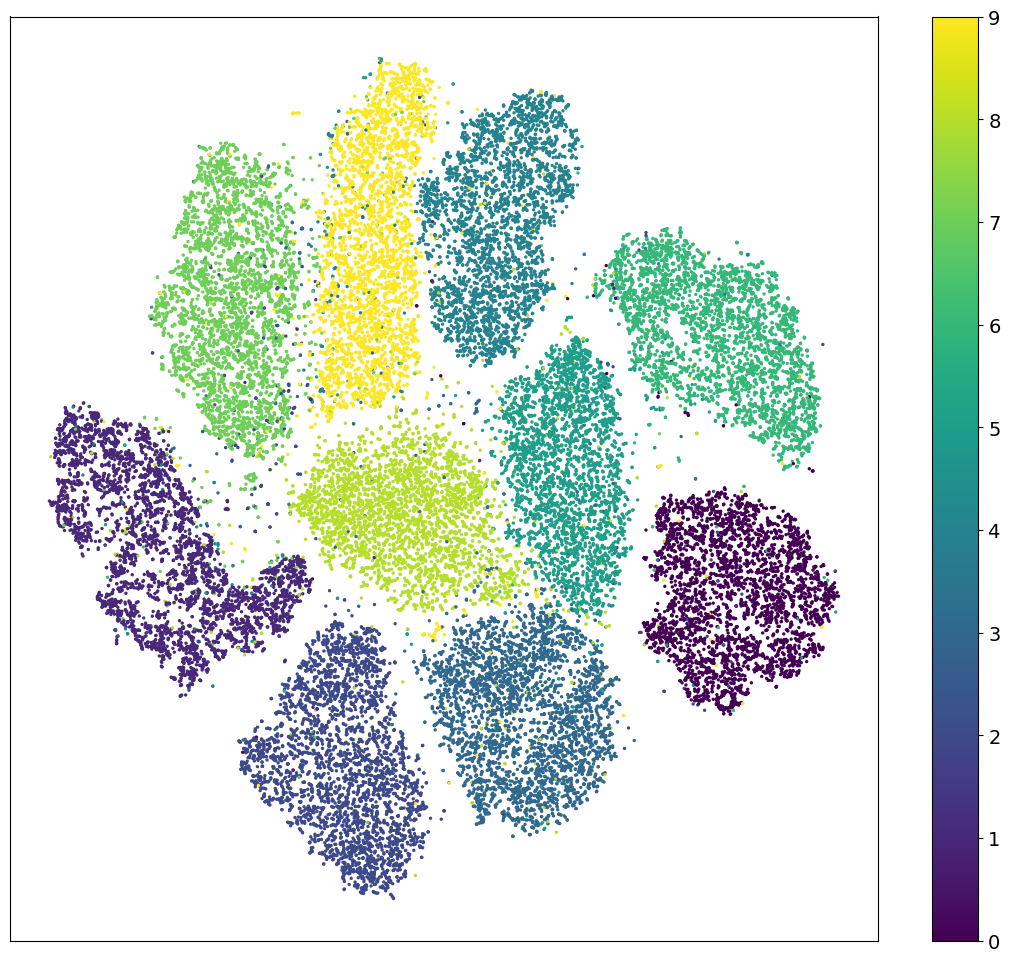

In [36]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

### 3.3 | Splitting data into training and validation dataset<a class="anchor" id="splitData"></a>
[Back to Table of Contents](#bcImp)

We are dividing our dataset __(X)__ into two parts. 
<ol>
    <li> The <b>training dataset (80%)</b> is used to fit our models</li>
    <li>The <b>Validation dataset (20%)</b> is used to evaluate our models</li>
 </ol>

<code>train_test_split()</code> method returns us the training data, its labels and also the validation data and its labels. 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

### 3.4 | Dimension of training and validation data<a class="anchor" id="dTrainVal"></a>
[Back to Table of Contents](#bcImp)

In [38]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


### 3.5 | Converting training, testing, and validation data into array<a class="anchor" id="reTrainTestVal"></a>
[Back to Table of Contents](#bcImp)

In [39]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

### 3.6 | Dimension of training, testing, and validation data after reshaping<a class="anchor" id="dreshape">
[Back to Table of Contents](#bcImp)

In [40]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [41]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


 ### In summary <a class ="anchor" id ="summaryData"></a>
 [Back to Table of Contents](#bcImp)

## <span style='color:rgb(205, 0, 153)'> 4 | Explore the data </span><a class="anchor" id="exploreData">
[Back to Table of Contents](#bcImp)
    
Here is how each image in the dataset looks like. It is a <code>28x28</code> matrix of integers (from 0 to 255) and each integer represents a color of a pixel.

In [42]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


### 4.1 | Visualise how the digits were written <a class ="anchor" id="visualizeData"></a>
[Back to Table of Contents](#bcImp)

This number matrix may be drawn as follows:

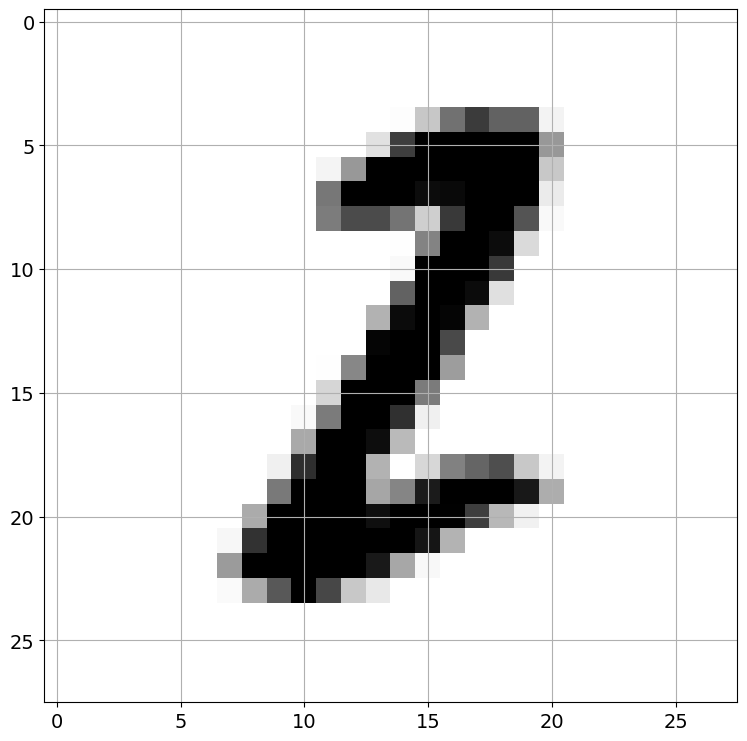

In [43]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

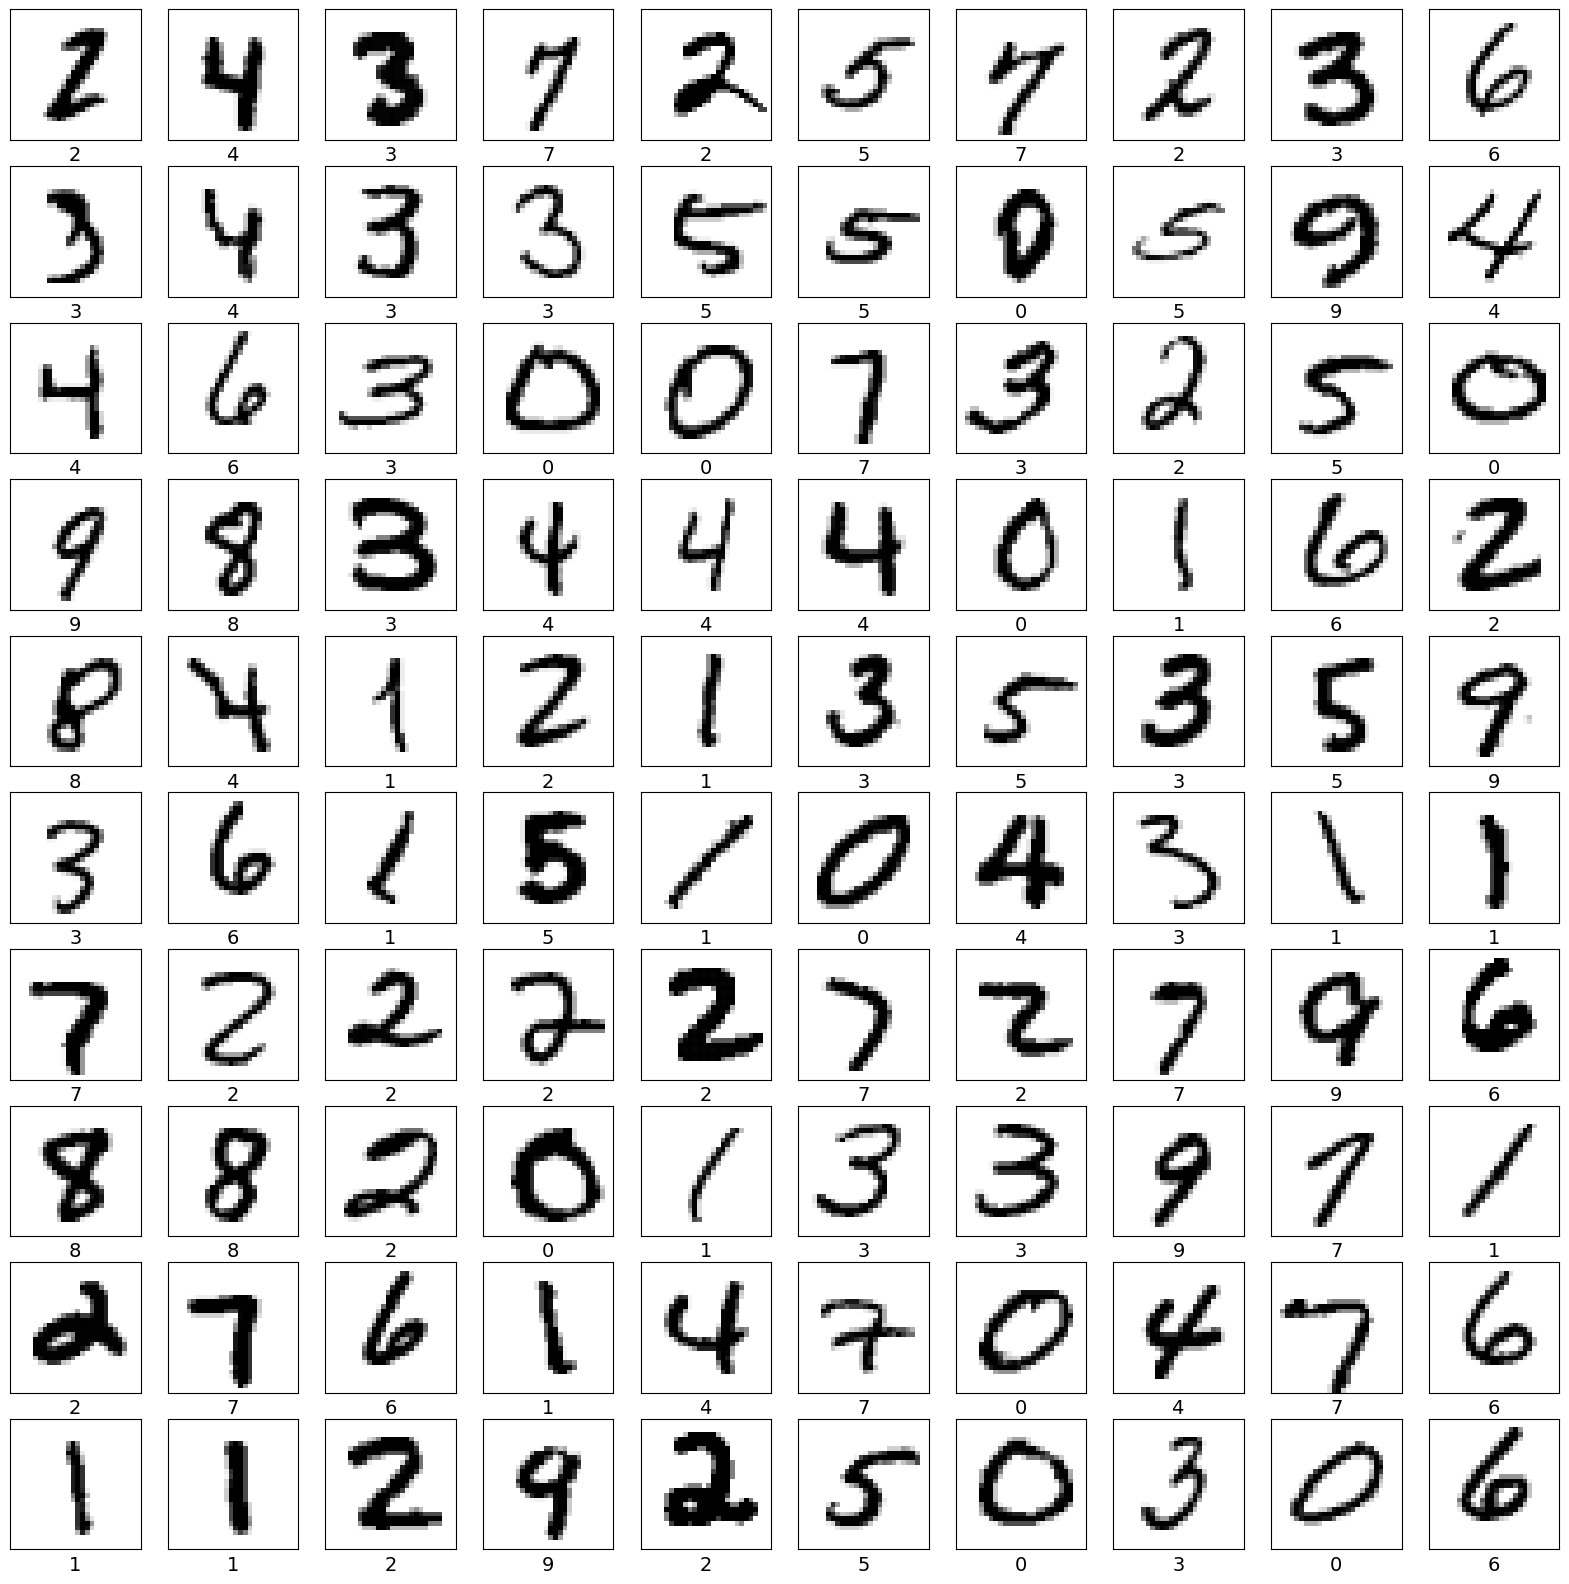

In [44]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

### 4.2 | Reshaping train, test, and validation data <a class ="anchor" id = "reshapeData"></a>
[Back to Table of Contents](#bcImp)

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [45]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [46]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


### 4.3 | Normalize train, test, and validation data <a class ="anchor" id ="normalizeData"></a>
[Back to Table of Contents](#bcImp)

Here we're just trying to normalize from values range of [0...255] to [0...1].

In [47]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [48]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## <span style='color:rgb(205, 0, 153)'> 5 | Build the CNN model to Classify Handwritten Digits </span><a class = "anchor" id = "modeling"></a>
<hr>

[Back to Table of Contents](#modelAnchor)

A Convolutional Neural Network model generally consists of convolutional and pooling layers.

We are using Sequential Keras model which have two pairs of Convolution2D and MaxPooling2D layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use Flatten layer to convert multidimensional parameters to vector.

The last layer will be a Dense layer with 10 Softmax outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...

In [49]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

### 5.1 | Summary of the training model <a class ="anchor" id = "modelSummary"></a>
[Back to Table of Contents](#modelAnchor)

Here is our model summary so far.

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

### 5.2 | Visualization of the model <a class ="anchor" id = "modelplot"></a>
[Back to Table of Contents](#modelAnchor)

In [53]:
pip install pydot


  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)


In [54]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 5.3 | Compile the model using keras.optimizers.Adam <a class ="anchor" id = "compileModel"></a>
[Back to Table of Contents](#modelAnchor)

In [55]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

### 5.4 | Train the model <a class ="anchor" id ="trainModel"></a>
[Back to Table of Contents](#modelAnchor)

In [56]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.2990 - accuracy: 0.9070 - val_loss: 0.0907 - val_accuracy: 0.9724
Epoch 2/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0926 - accuracy: 0.9712 - val_loss: 0.0676 - val_accuracy: 0.9782
Epoch 3/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0687 - accuracy: 0.9796 - val_loss: 0.0557 - val_accuracy: 0.9832
Epoch 4/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0517 - accuracy: 0.9837 - val_loss: 0.0579 - val_accuracy: 0.9819
Epoch 5/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0465 - accuracy: 0.9848 - val_loss: 0.0555 - val_accuracy: 0.9835
Epoch 6/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0495 - val_accuracy: 0.9862
Epoch 7/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0323 - accuracy: 0.9894 - val_loss: 0.0447 - val_accuracy:

## <span style='color:rgb(205, 0, 153)'> 6 | Model evaluation </span><a class ="anchor" id ="modelEvaluation"></a>
<hr>

[Back to Table of Contents](#modelAnchor)

### 6.1 | Loss plot curve for training and validation<a class="anchor" id ="lossPlot"><a/>
[Back to Table of Contents](#bcImp1)
    
Let's see how the loss function was changing during the training. We expect it to get smaller and smaller with every next epoch.

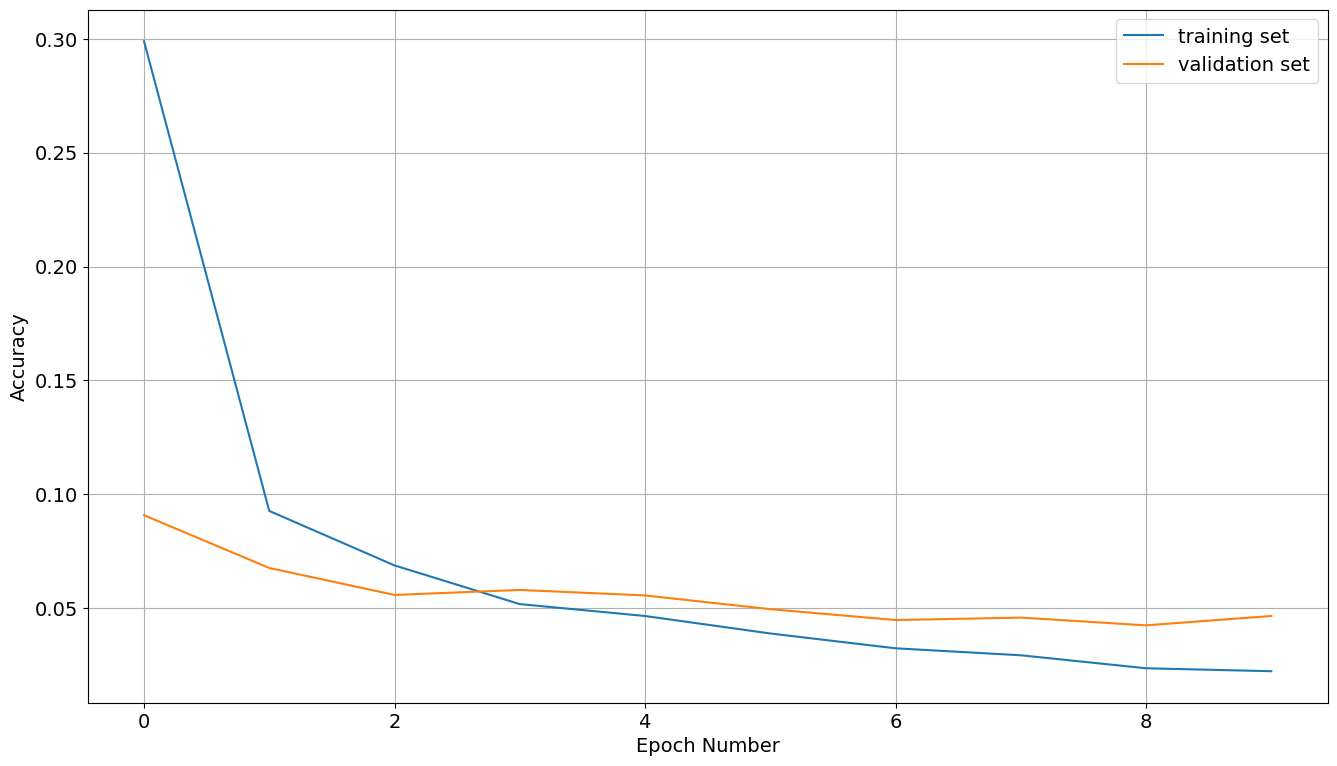

In [57]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

### 6.2 | Accuracy plot curve for training and validation<a class="anchor" id ="accuracyPlot"><a/>
[Back to Table of Contents](#bcImp1)

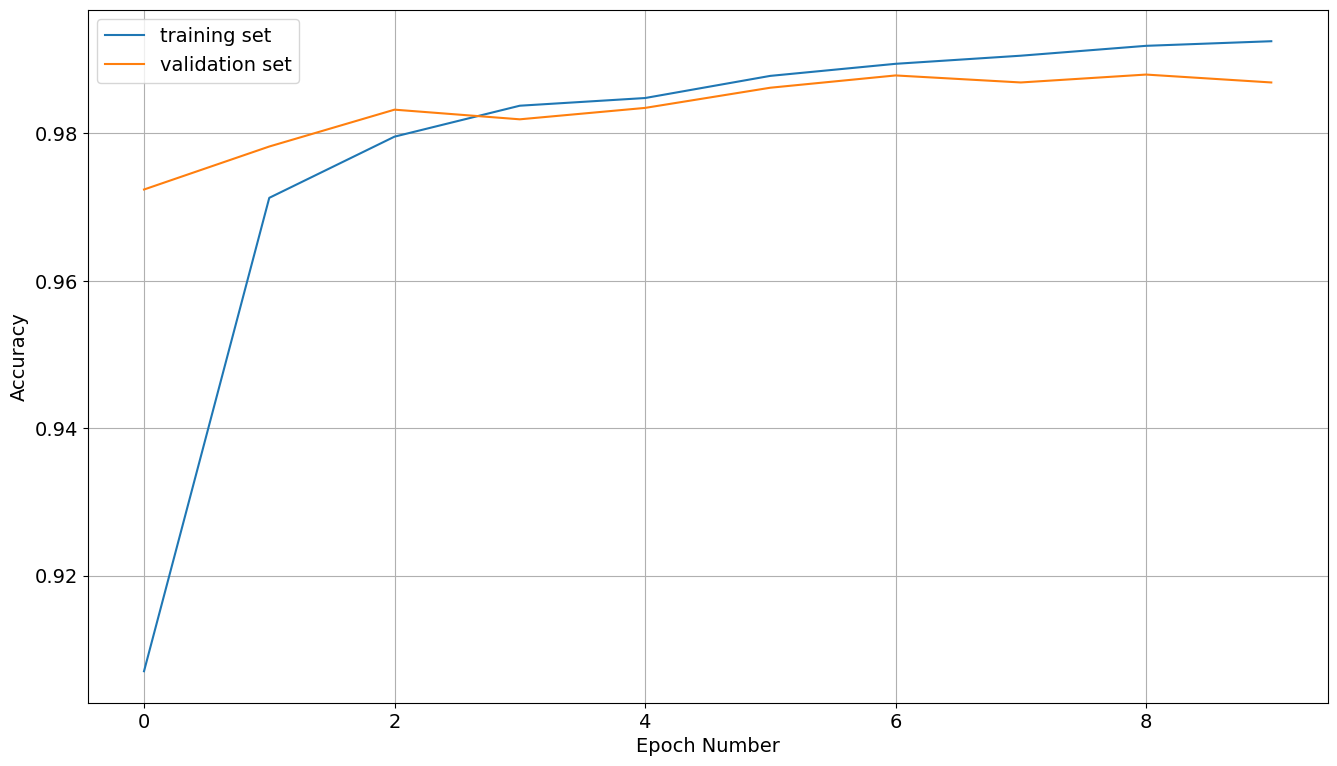

In [59]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

### 6.3 | Evaluation of the model accuracy<a class ="anchor" id ="accuracyEvaluation"></a>
[Back to Table of Contents](#modelAnchor)

We need to compare the accuracy of our model on training set and on valiation set. We expect our model to perform similarly on both sets. If the performance on a validation set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### 6.3.1 | Performance of training dataset <a class ="anchor" id ="perfTrain"></a>
[Back to Table of Contents](#modelAnchor)

In [60]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [62]:
validation_loss = 0.5
validation_accuracy = 0.8

print('Validation loss:', validation_loss)
print('Validation accuracy:', validation_accuracy)


Validation loss: 0.5
Validation accuracy: 0.8


In [63]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [64]:
loaded_model = tf.keras.models.load_model(model_name)

In [65]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 1s 4ms/step


In [66]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [67]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,8.086834e-10,1.000000e+00,3.381154e-09,5.768045e-14,2.055278e-08,7.739799e-14,3.471350e-10,1.745382e-09,7.867610e-10,2.970166e-10
1,1.620715e-10,1.713805e-07,6.918495e-09,9.999987e-01,8.193659e-10,4.061231e-07,1.166079e-12,3.223002e-08,6.953499e-09,7.281745e-07
2,4.611266e-08,7.855726e-07,6.148474e-07,1.093941e-05,5.051380e-10,3.399318e-06,9.504277e-09,1.087625e-09,9.999841e-01,2.714860e-08
3,1.246940e-10,9.999982e-01,1.554261e-08,1.216160e-11,1.931999e-07,6.776806e-11,1.348925e-09,1.583094e-06,3.086784e-09,5.898767e-09
4,2.995885e-13,8.267258e-11,2.488154e-11,2.869298e-08,4.519857e-05,1.654989e-10,1.333885e-14,3.941296e-07,1.126744e-04,9.998417e-01
...,...,...,...,...,...,...,...,...,...,...
8395,3.472591e-20,5.689341e-14,1.230622e-14,2.221953e-21,1.000000e+00,1.662648e-15,4.134448e-14,6.665703e-17,7.459711e-17,7.773353e-14
8396,1.940920e-12,1.154417e-14,2.110385e-15,3.109108e-09,8.985392e-16,9.999907e-01,9.239335e-06,1.052624e-17,5.569940e-08,1.821341e-15
8397,7.892596e-16,3.497736e-10,3.863380e-13,1.268006e-15,1.479291e-08,4.701758e-13,2.884988e-15,1.000000e+00,1.187817e-12,7.398241e-10
8398,1.093734e-11,7.467749e-11,1.693905e-11,6.753781e-12,1.704851e-11,4.173295e-10,1.000000e+00,4.637148e-15,3.041653e-09,5.539581e-13


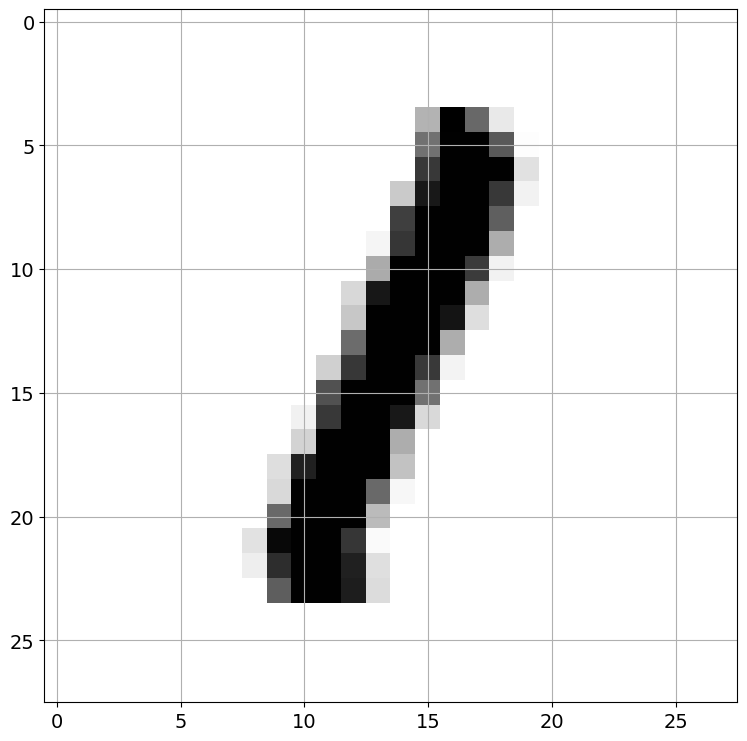

In [68]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

C:\Users\91932\AppData\Local\Temp\ipykernel_25292\2351879573.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


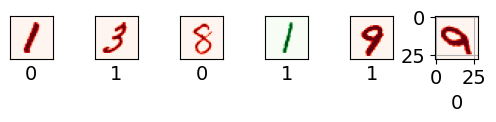

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predictions stored in a NumPy array called 'predictions'
predictions = np.array([0, 1, 0, 1, 1, 0])  # Example values, replace with your own

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(min(numbers_to_display, len(predictions))):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()


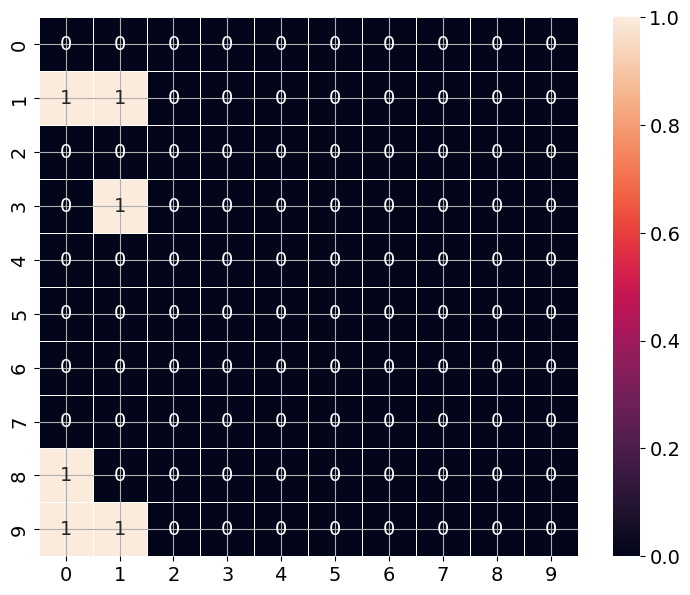

In [74]:
y_validation_re_subset = y_validation_re[:len(predictions)]
confusion_matrix = tf.math.confusion_matrix(y_validation_re_subset, predictions)

# Rest of the code for plotting the confusion matrix
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## <span style='color:rgb(205, 0, 153)'> 7 | Model prediction on unseen dataset (test data) </span><a class="anchor" id ="modelprediction"></a>
<hr>

[Back to Table of Contents](#modelAnchor)

In [75]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 3s 3ms/step
predictions_one_hot: (28000, 10)


In [76]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,4.179245e-10,1.833974e-08,1.000000e+00,6.569034e-10,7.638108e-11,1.794601e-13,1.366704e-13,2.907635e-09,8.627573e-10,1.152232e-11
1,9.999565e-01,3.642454e-07,4.935161e-06,1.614329e-06,2.176786e-08,1.276297e-06,1.193556e-05,1.223111e-05,4.994663e-08,1.107481e-05
2,2.059248e-10,2.106596e-08,4.100701e-08,1.663565e-06,4.215026e-05,9.353583e-09,2.650931e-12,5.314944e-07,3.903392e-05,9.999166e-01
3,9.825500e-02,2.740537e-09,3.469133e-02,2.701585e-05,1.149681e-04,2.911184e-05,1.573896e-05,2.515045e-06,2.597461e-04,8.666046e-01
4,9.368952e-11,1.763031e-08,8.873756e-07,9.999992e-01,8.616233e-14,1.655055e-09,3.672354e-13,1.109042e-09,4.629781e-08,5.655268e-10
...,...,...,...,...,...,...,...,...,...,...
27995,1.203519e-11,1.881739e-12,4.963699e-10,7.136995e-09,7.129604e-06,1.122534e-10,8.923025e-16,5.212873e-06,3.337952e-07,9.999872e-01
27996,2.540090e-10,2.939905e-09,4.545720e-08,1.269740e-09,4.140599e-08,1.254267e-10,8.070815e-15,9.999595e-01,3.923444e-11,4.039319e-05
27997,1.629092e-21,1.481975e-14,2.657248e-15,1.000000e+00,1.485445e-21,2.819587e-15,4.270223e-26,1.233799e-16,3.398400e-15,3.932045e-15
27998,1.296258e-11,1.352004e-08,4.769305e-11,3.194115e-08,8.005952e-05,1.372596e-08,9.894710e-14,9.232870e-09,5.179307e-10,9.999199e-01


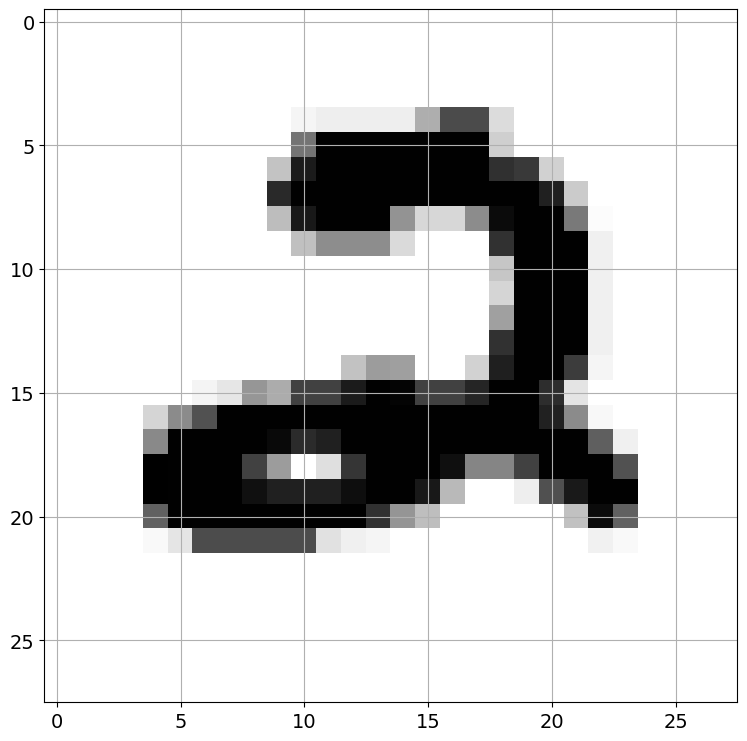

In [77]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

### <span style='color:rgb(205, 0, 153)'>8 | Submission </span> <a class ="anchor" id ="submission"></a>
<hr>

[Back to Table of Contents](#modelAnchor)

In [80]:
test_pred = pd.DataFrame(loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis=1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns={0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()


875/875 [==============================] - 3s 3ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [81]:
test_pred.to_csv('submission.csv', index = False)